In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train = pd.read_csv("taxi_data/train.csv", parse_dates=["pickup_datetime","dropoff_datetime"])
test = pd.read_csv("taxi_data/test.csv", parse_dates=["pickup_datetime"])
display(train, test)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,N,373


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.00346,40.72511,-74.00125,40.73364,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.00636,40.74378,-73.95341,40.78247,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.97227,40.75986,-73.87660,40.74866,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.97650,40.73356,-73.85426,40.89179,N


In [69]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [70]:
pd.options.display.float_format='{:.5f}'.format
train.describe()#Object는 describe로 나타나지 않는다

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


<AxesSubplot: >

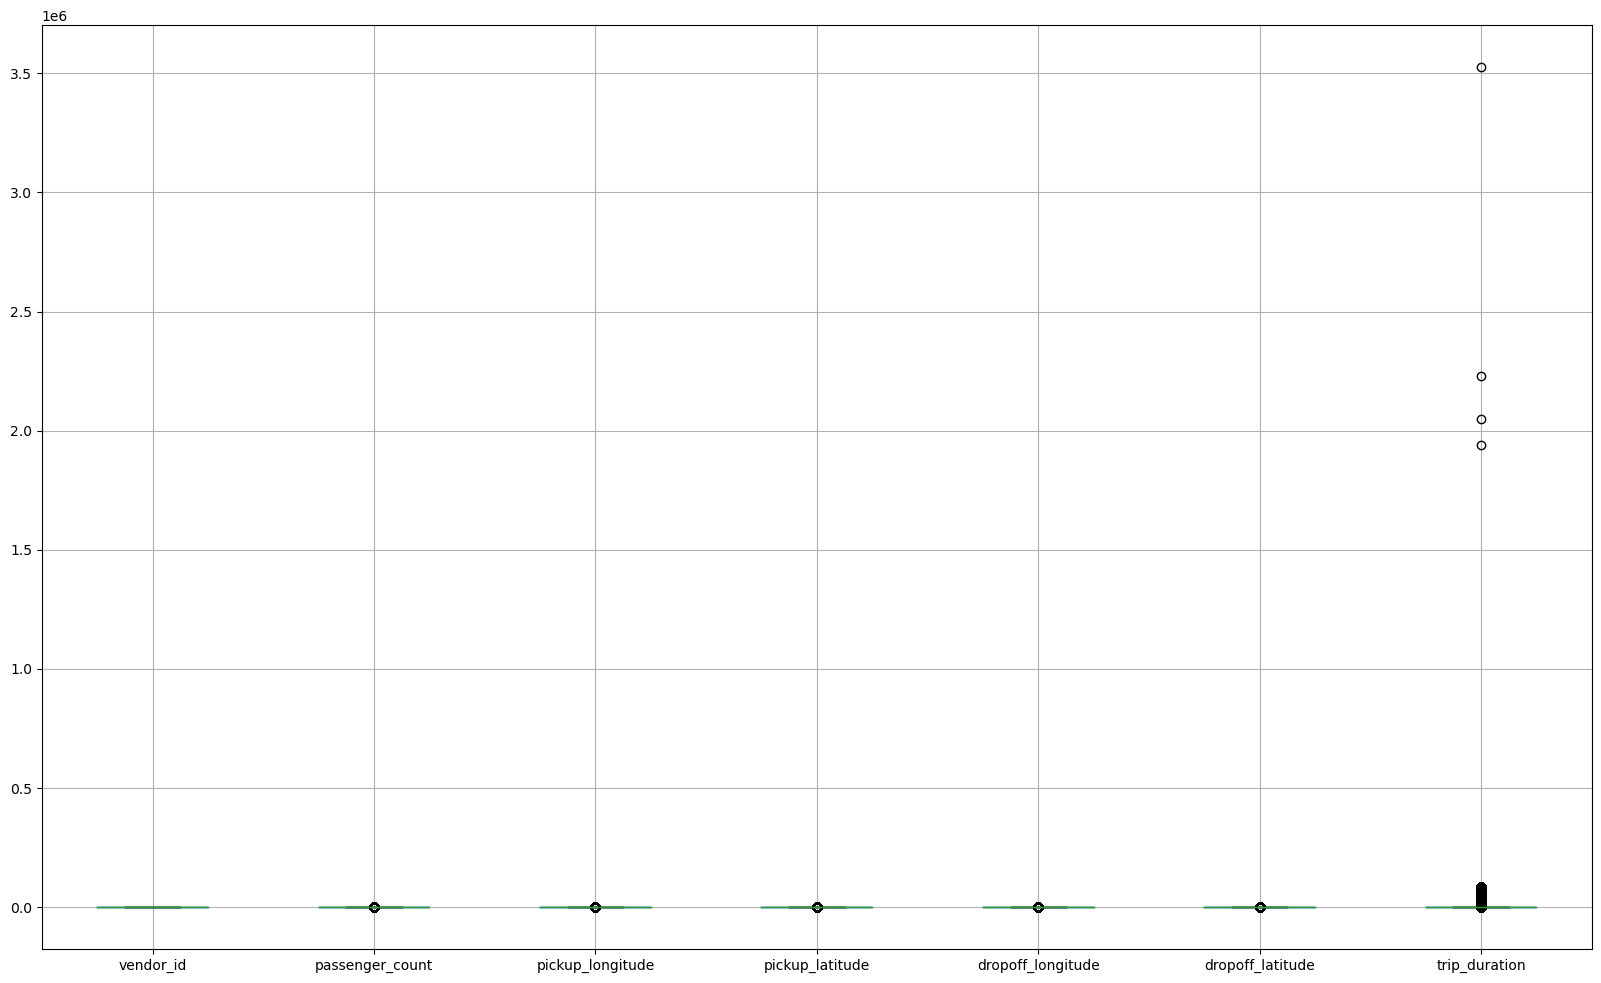

In [71]:
plt.figure(figsize=(20,12))
train.boxplot()

<AxesSubplot: >

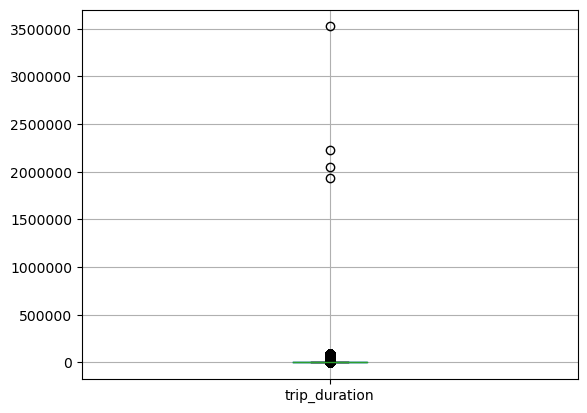

In [72]:
plt.ticklabel_format(axis='y', useOffset=False, style='plain') #지수의 표현을 일반적인 숫자로 표기함
train.boxplot(column="trip_duration",return_type = "axes") # 많이 벗어난 아웃라이어가 있다는 것을 알게됌

<AxesSubplot: >

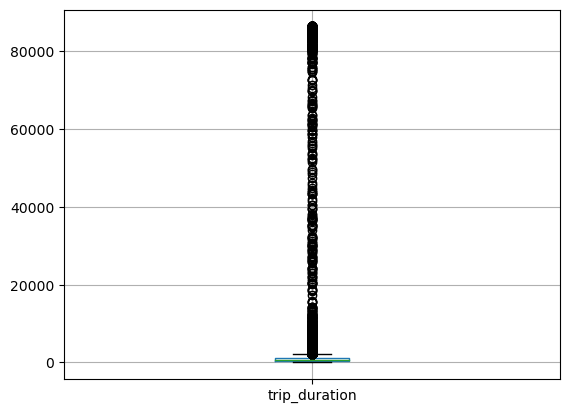

In [73]:
train = train.drop(train[train["trip_duration"] > 1500000].index, axis= 0) # 아웃라이어를 버림
plt.ticklabel_format(axis='y', useOffset=False, style='plain') #지수의 표현을 일반적인 숫자로 표기함
train.boxplot(column="trip_duration",return_type = "axes")

<AxesSubplot: >

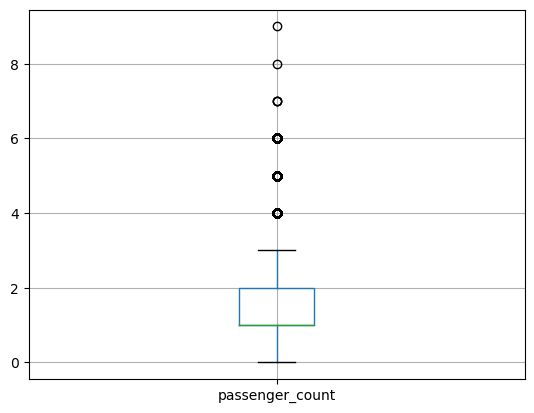

In [74]:
train.boxplot(column="passenger_count",return_type = "axes") #승객이 안탄 데이터가 있다는 것을 알게됌

<AxesSubplot: >

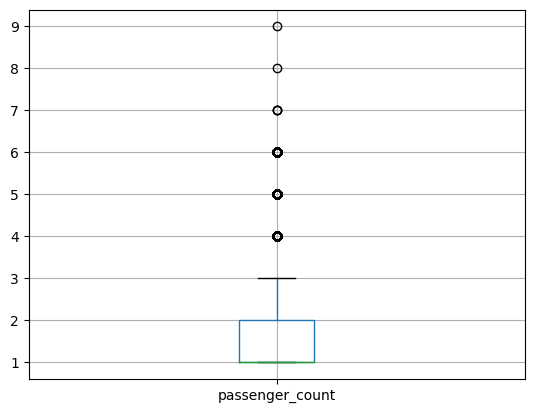

In [75]:
train = train.drop(train[train["passenger_count"] < 1].index, axis= 0) #승객인 0 인 데이터를 삭제
train.boxplot(column="passenger_count",return_type = "axes")

In [76]:
train = train = train.drop(train[train["pickup_longitude"] < -120].index, axis= 0)
train = train = train.drop(train[train["dropoff_longitude"] < -120].index, axis= 0)

<function matplotlib.pyplot.show(close=None, block=None)>

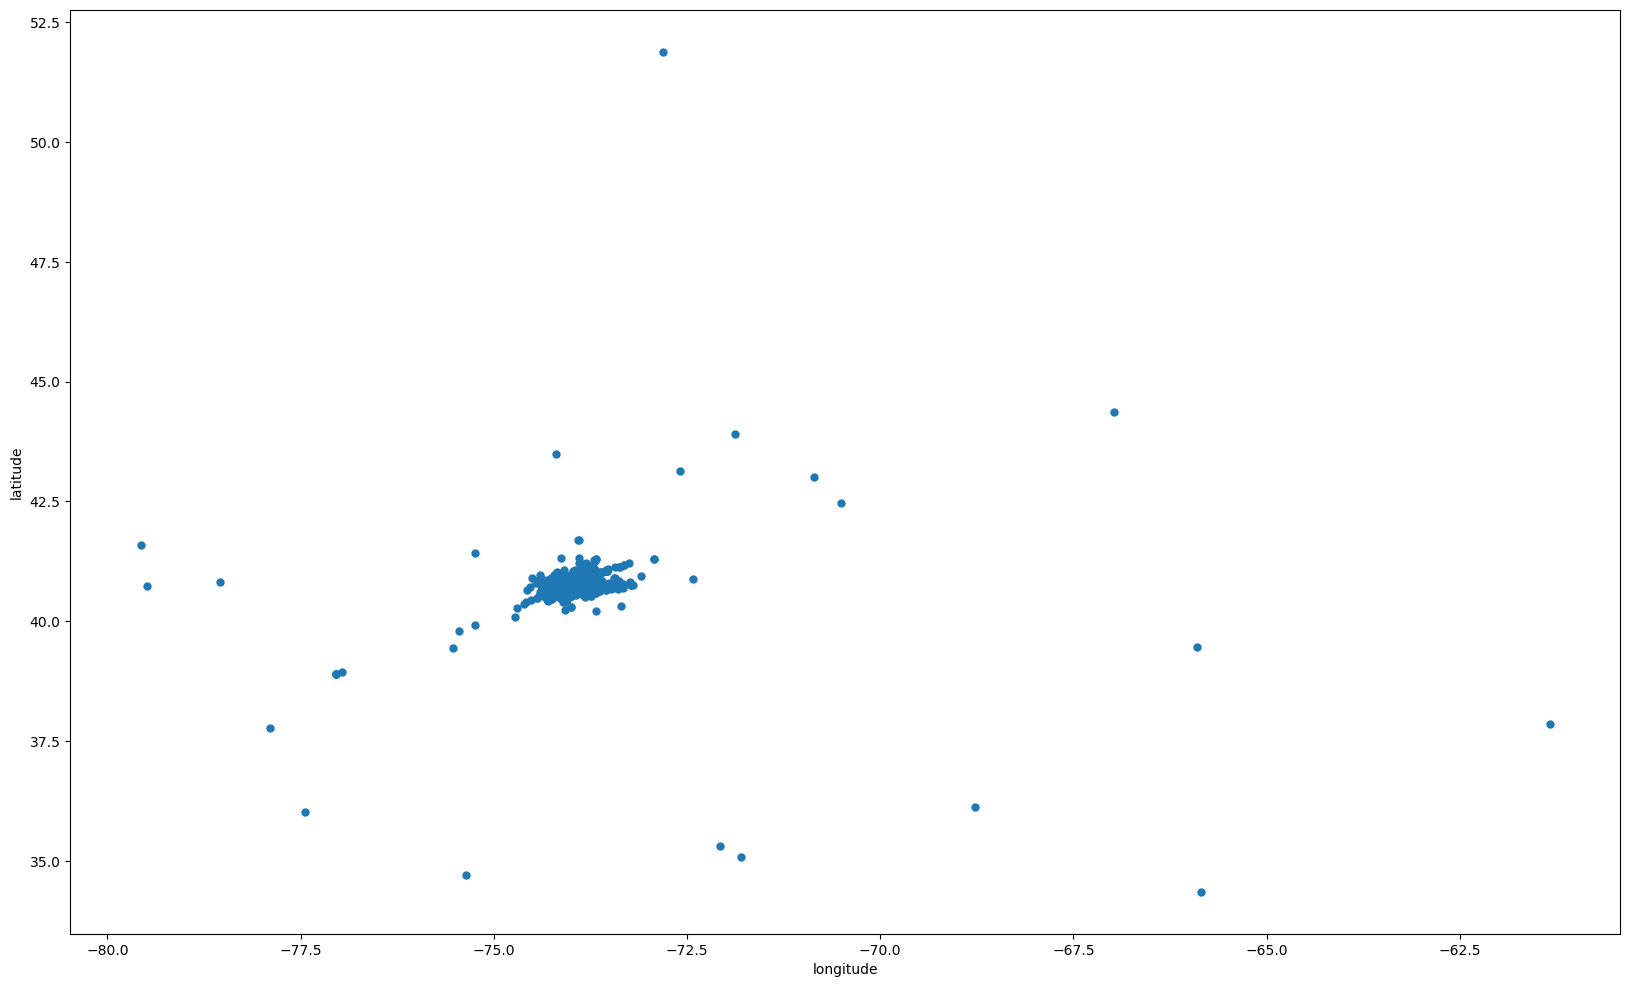

In [77]:
pickup_ln=list(train.pickup_longitude)
pickup_la=list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln,pickup_la, '.',alpha = 1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

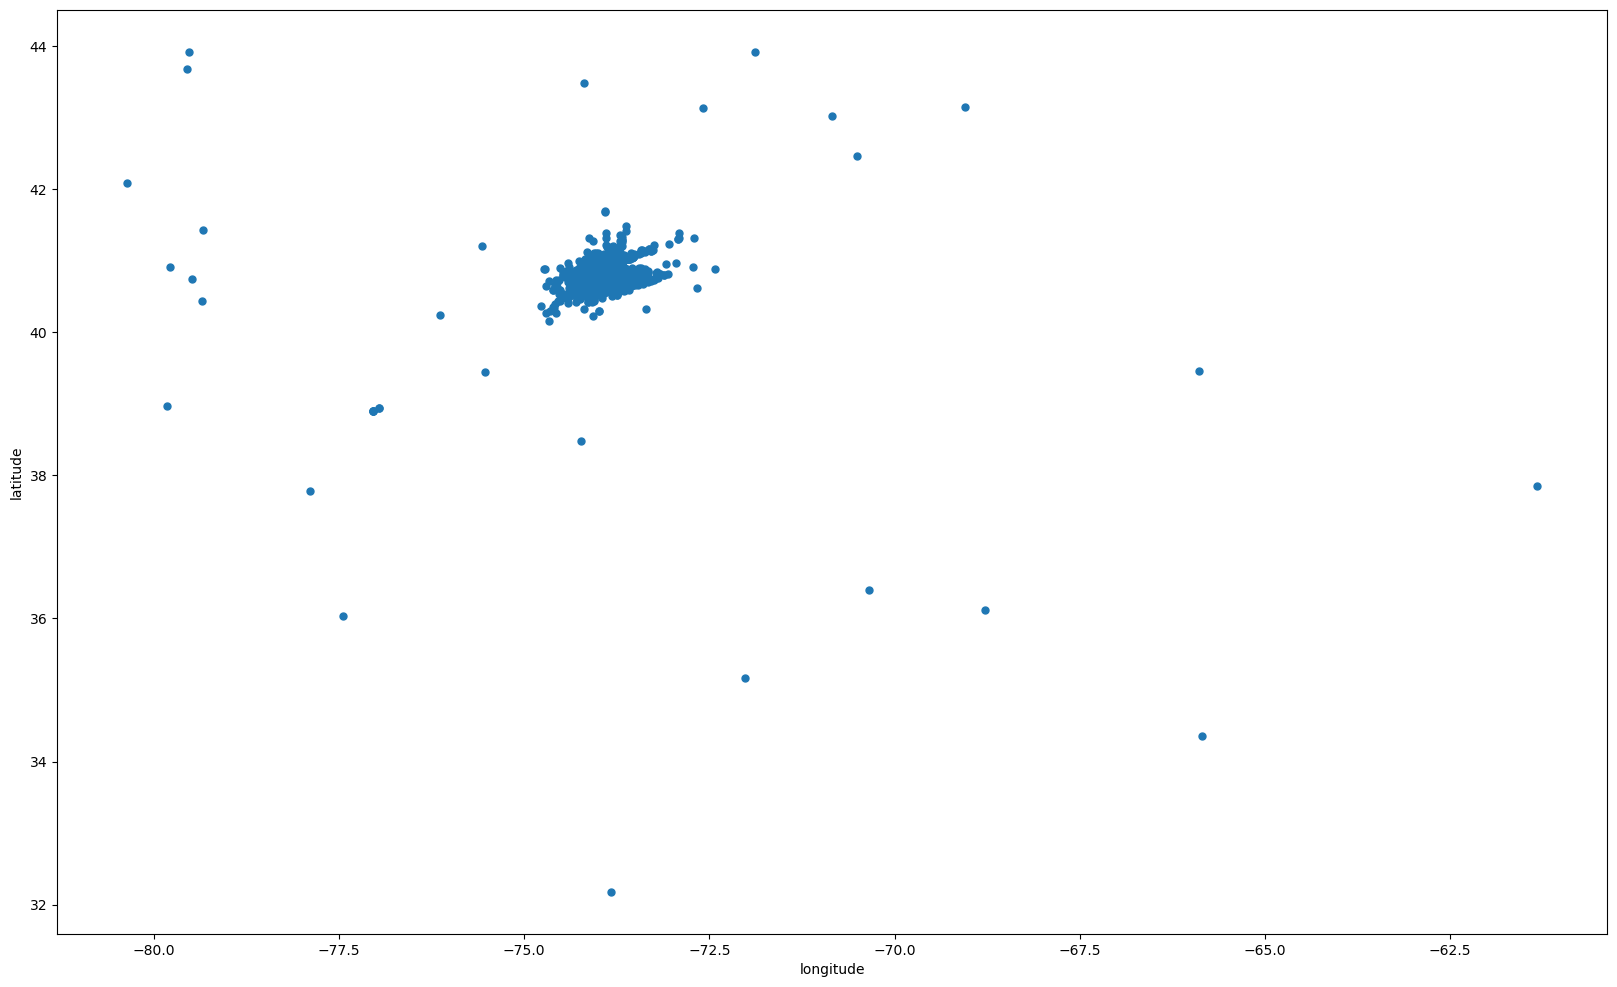

In [78]:
dropoff_ln=list(train.dropoff_longitude)
dropoff_la=list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln,dropoff_la, '.',alpha = 1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show

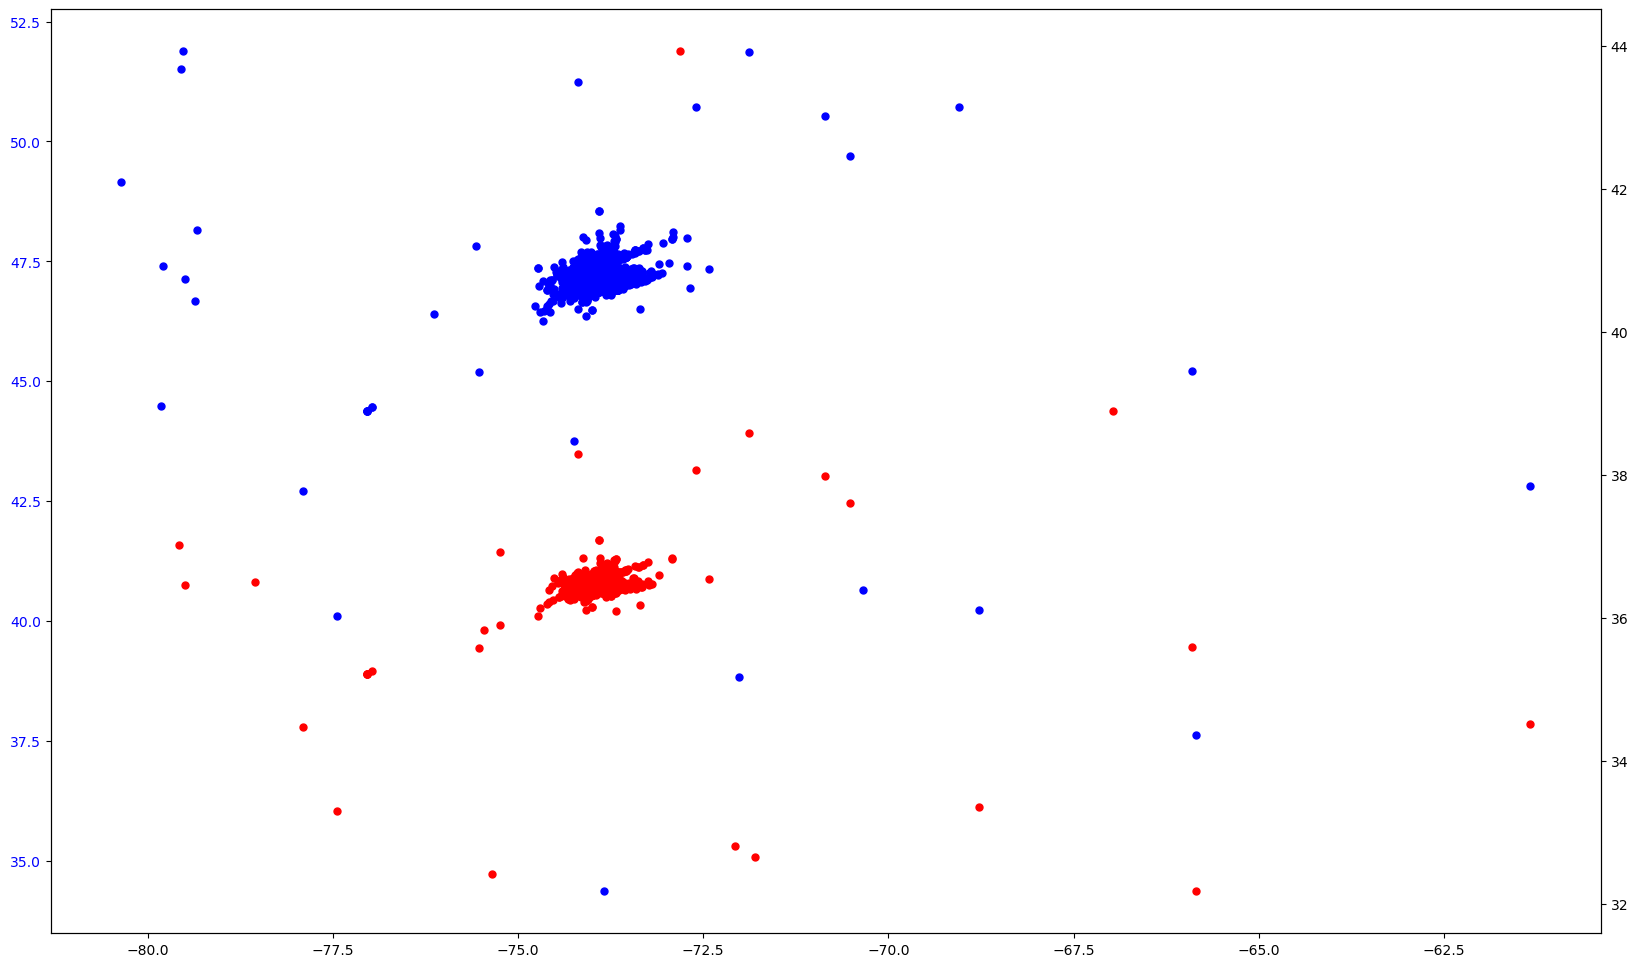

In [79]:
#pick up과 dropoff의 위치그래프를 그려봄
plt.figure(figsize=(20,12))
ax1 = plt.subplot()
ax1.plot(pickup_ln,pickup_la, '.',alpha = 1, markersize=10, color="red")
ax1.tick_params(axis='y',labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(dropoff_ln,dropoff_la, '.',alpha = 1, markersize=10,color="blue")
ax1.tick_params(axis='y',labelcolor="blue")

<function matplotlib.pyplot.show(close=None, block=None)>

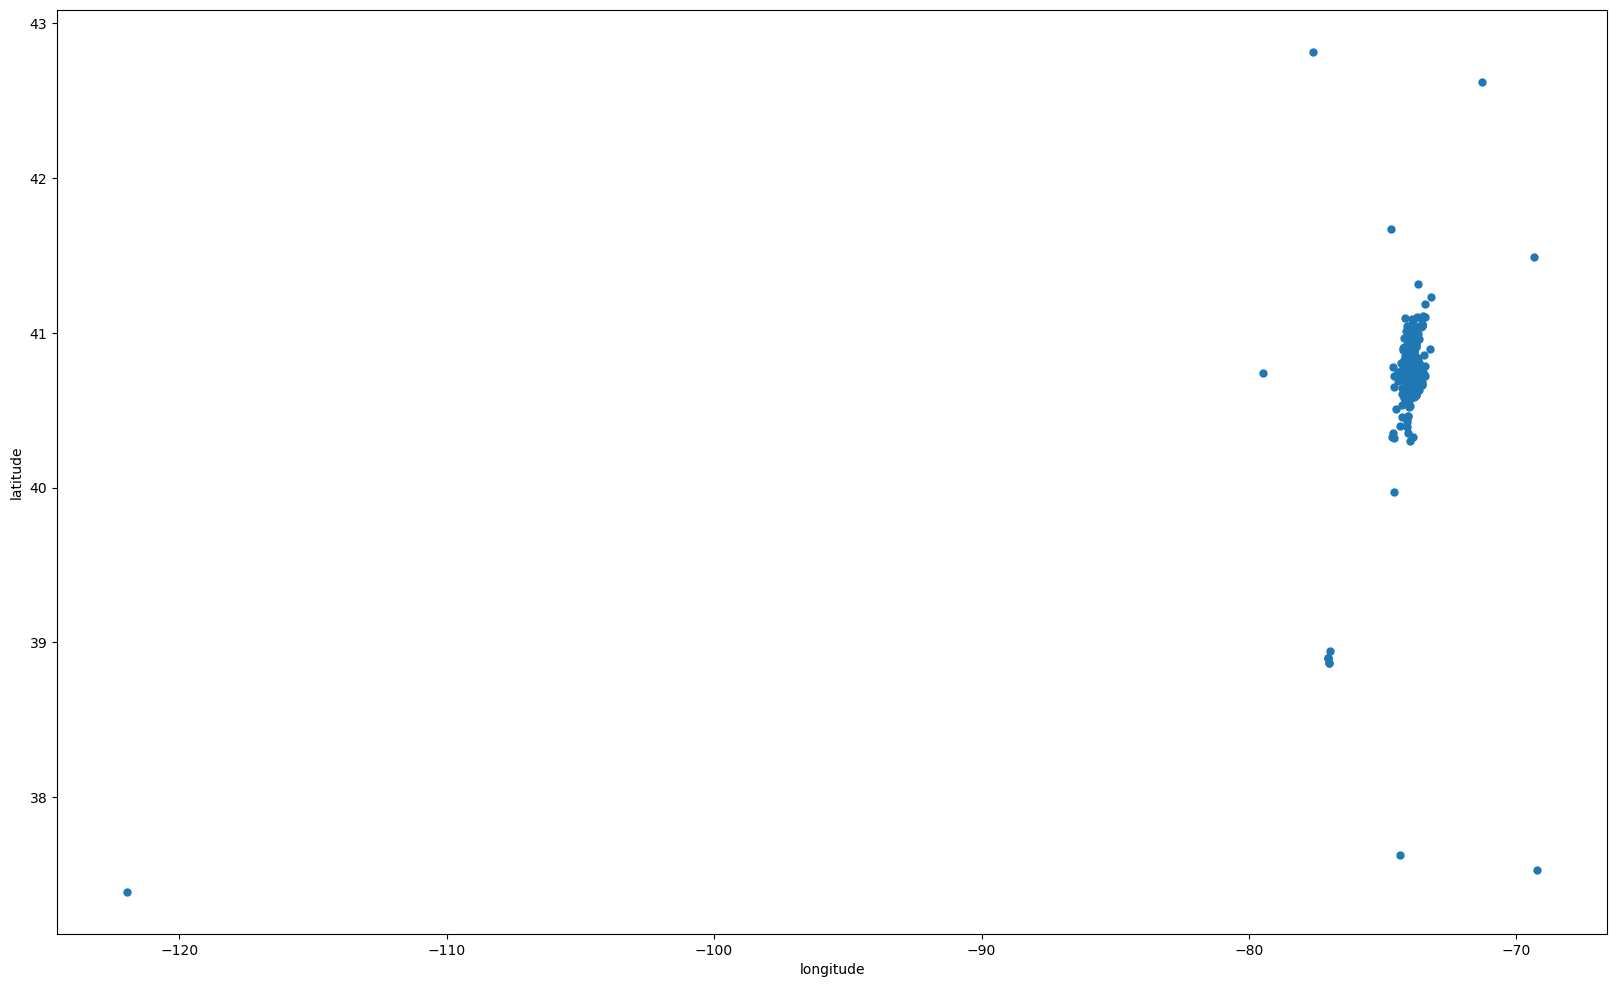

In [80]:
tpickup_ln=list(test.pickup_longitude) #test는 데이터를 짜르면안된다
tpickup_la=list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(tpickup_ln,tpickup_la, '.',alpha = 1, markersize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show

In [81]:
plt.figure(figsize=(20,12))
plt.hist(train["trip_duration"].values, bins=100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

AttributeError: 'str' object has no attribute 'values'

<Figure size 2000x1200 with 0 Axes>